# Homework 8

**Harvard University**<br>
**Fall 2018**<br>
**Instructors: Rahul Dave**<br>
**Due Date:** Saturday, November 3rd, 2018 at 11:59pm

**Instructions:**

- Upload your final answers in the form of a Jupyter notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

### Collaborators

**Michelle (Chia Chi) Ho, Jiejun Lu, Jiawen Tong**

<div class="answer-separator">
------------------------
</div>

In [1]:
import numpy as np
import scipy.stats
import scipy.special
from sklearn.linear_model import LinearRegression

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib import cm

import pandas as pd
import seaborn as sns

%matplotlib inline

## Question 1: In the AM207 Nursery We Help Canadians Smoke Trees with Purple Stuff

**Some coding required**

**This is part 1 of a 2 part problem.  You'll see the second part in a later problem set...**

A plant nursery in Cambridge is exprimentally cross-breeding two types of hibiscus flowers: blue and pink. The goal is to create an exotic flower whose petals are pink with a ring of blue on each. 

There are four types of child plant that can result from this cross-breeding: 

  - Type 1: blue petals
  - Type 2: pink petals 
  - Type 3: purple petals
  - Type 4: pink petals with a blue ring on each (the desired effect). 

Out of 197 initial cross-breedings, the nursery obtained the following distribution over the four types of child plants: 

$$Y = (y_1, y_2, y_3, y_4) = (125, 18, 20, 34)$$

where $y_i$ represents the number of child plants that are of type $i$.

The nursery then consulted a famed Harvard plant geneticist, who informed them that the probability of obtaining each type of child plant in any single breeding experiment is as follows:

$$ \frac{\theta+2}{4}, \frac{1-\theta}{4}, \frac{1-\theta}{4}, \frac{\theta}{4}.$$

Unfortunately, the geneticist was unable to specify the quantity $\theta$.

Clearly, the nursery is interested in understanding how many cross-breeding they must perform, on average, in order to obtain a certain number of child plants with the exotic blue rings. To do this they must be able to compute $\theta$. 

The owners of the nursery, being top students in AM207, decided to model the experiment in hopes of discovering $\theta$ using the results from their 197 initial experiments. 

They chose to model the observed data using a multinomial model and thus calculated the likelihood to be:

$$ p(y  \vert  \theta) \propto (2+\theta)^{y_1} (1-\theta)^{y_2+y_3}  \, \theta^{y_4} $$


The nursery owners decided to augment their model and hopefully obtain a friendlier looking distribution that allows for easy EM based maximum-likelihood finding and sampling (which you will do in next week's homework).

They augment the data with a new variable $z$ such that:

$$z + (y_1 - z) = y_1.$$

That is, using the latent variable $z$, the number of type I child plants $y_1$ can be broken into two subtypes. Let the probability of obtaining the two subtype be $1/2$ and $\theta/4$, respectively. $y_1$ can now be interpreted as to be the total number of trials in a binomial trial. Thus, the new likelihood can be written as

$$ p(y, z  \vert  \theta) \propto \binom{y_{1}}{z} \left (\frac{1}{2} \right )^{y_1-z} \left(\frac{\theta}{4} \right )^{z}  (1-\theta)^{y_2+y_3}  \, \theta^{y_4}
$$

Treat the augmented model as a latent variable model.

Write down an expression (up to unimportant constants - you must decide what unimportant means) for each of the following:

1.1. The observed data log likelihood $\mathcal{l}(y \ \vert \ \theta)$

1.2. The complete data log likelihood $\mathcal{L}(y, z\ \vert \ \theta)$

1.3. The Auxilary function, $Q(\theta, \theta^{(t-1)})$, or the expected complete data log likelihood, defined by

$$Q(\theta, \theta^{(t-1)}) = \mathbb{E}_{Z  \vert  Y=y, \Theta = \theta^{t-1}}[\mathcal{L}(y, z\ \vert \ \theta)]$$

1.4. Find an expression for $\theta^{t} = \text{argmax}_\theta Q(\theta, \theta^{(t-1)})$ by maximizing the Auxilary function $Q(\theta, \theta^{(t-1)})$ given $\theta, \theta^{t-1}$ to find the optimal value for $\theta^{t}$.  

**Hint:** You don't actually need to do any difficult optimization for the M-step. After taking the expectation of the complete data log likelihood in the E-step, match your $Q(\theta, \theta^{(t-1)})$ to the log pdf of a familiar distribution, then use the known formula for the mode of this distribution to optimize $Q(\theta, \theta^{(t-1)})$.

1.5. Use your forumulas from 1.3 and 1.4 for $Q(\theta, \theta^{t-1})$ and $\theta^{t}$ to calculate the maximum likelihood through Expectation Maximization (EM). In order to perform EM, you must iterate through the following steps

- (Expectation) Compute the Auxilary function, $Q(\theta, \theta^{t-1})$ (the expectation of the full data likelihood)
- (Maximization) Compute $\theta^{t} = \text{argmax}_\theta Q(\theta, \theta^{(t-1)})$

Choose your own reasonable criterion for convergence to **estimate the MLE** of $\theta$ using EM.




**Gratuitous Titular Reference**:  Canada recently became the second country in the world to [legalize marijuana](https://www.cnn.com/2018/06/20/health/canada-legalizes-marijuana/index.html).  [Purple Stuff](https://www.amazon.com/Purple-Stuff-Soda-Relaxation-Beverage/dp/B00FF4AXTE) is a health beverage available on Amazon with a name and taste that's a tip of the hat to [Purple Drank](https://en.wikipedia.org/wiki/Purple_drank), the codeine infused beverage also popularly known as *lean* and is synonymous with the Houston hip hop scene (and in particular DJ Screw and his famous Chopped and Screwed style).

### Answer 1.1

$$
\begin{align}
\mathcal{l}(y \ \vert \ \theta) 
&= \log{p(y \ \vert \ \theta)} \\
&= \log \sum_{z=0}^{y_1} p(z, y \ \vert \ \theta) \\
&= \log \Big\{ \binom{y}{y_1} \Big(\frac{1}{2} + \frac{\theta}{4} \Big)^{y_1} 
\cdot \binom{y-y_1}{y_2} \Big(\frac{1-\theta}{4} \Big)^{y_2}
\cdot \binom{y-y_1-y_2}{y_3} \Big(\frac{1-\theta}{4} \Big)^{y_3}
\cdot \Big(\frac{\theta}{4} \Big)^{y_4} \Big\} \\ \\
&= y_1 \log{(2+\theta)} + (y_2 + y_3) \log{(1-\theta)} + y_4 \log{\theta} + const(\theta)
\end{align}
$$

---
### Answer 1.2

$$
\begin{align}
\mathcal{L}(y, z\ \vert \ \theta) 
&= \log{p(y, z \ \vert \ \theta)} \\
&= \log{ \Big\{
\binom{y}{y_1} \binom{y_1}{z} \Big(\frac{1}{2} \Big)^{y_1-z} \Big(\frac{\theta}{4} \Big)^z  
\cdot \binom{y-y_1}{y_2} \Big(\frac{1-\theta}{4} \Big)^{y_2}
\cdot \binom{y-y_1-y_2}{y_3} \Big(\frac{1-\theta}{4} \Big)^{y_3}
\cdot \Big(\frac{\theta}{4} \Big)^{y_4}  
}\Big\} \\ \\
&= (z + y_4) \log{\theta} + (y_2 + y_3) \log{(1-\theta)} + const(\theta)
\end{align}
$$

---
### Answer 1.3


$$w = \mathbb{E}_{Z  \vert  Y=y, \Theta = \theta^{t-1}}[z]$$

$$Q(\theta, \theta^{(t-1)}) 
= (w + y_4) \log{\theta^{(t-1)}} + (y_2 + y_3) \log{(1-\theta^{(t-1)})} + const
$$

---
### Answer 1.4

$$
\frac{\partial Q}{\partial \theta} = \frac{w + y_4}{\theta} - \frac{y_2 + y_3}{1 - \theta} = 0
$$

$$
\Longrightarrow \hat{\theta}_{\text{MLE}} = \frac{w + y_4}{w + y_4 + y_2 + y_3}
$$

---
### Answer 1.5
- E-step: approximate $z$ using $w$:

$$w = \mathbb{E}_{Z  \vert  Y=y, \Theta = \theta^{t-1}}[z] = \mathbb{E} \Big[ \text{Binomial}(N=y_1, p=\frac{\theta}{\theta + 2}) \Big] = \frac{y_1 \theta}{\theta + 2}$$

- M-step: update parameter $\theta$ with the real data $y = (y_0, y_1, y_2, y_3)$ and the current $z \approx w$:

$$\hat{\theta}_{\text{MLE}} = \frac{w + y_4}{w + y_4 + y_2 + y_3}$$


In [2]:
# 1.5
def EM_cross_breeding(y, theta0, crit=1e-15):
    converged = False
    iterations = 0
    theta = theta0 # initial theta
    w = y[0] * theta / (theta + 2) # initial w
    print('Initial theta = {}, w = {}'.format(theta, w))
    
    theta_trace = [theta]
    while not converged:
        iterations += 1 
        w = y[0] * theta / (theta + 2) # E-step
        theta_new = (w+ y[3]) / (w + y[1:].sum()) # M-step
        converged = (np.abs(theta_new - theta) < crit) # check convergence
        theta = theta_new # update theta
        theta_trace.append(theta[0]) # record theta

    print('Iterations = {}'.format(iterations))
    print('Final theta = {}, w = {}'.format(theta, w))
    
    return theta_trace

y = np.array([125, 18, 20, 34])
theta0 = np.random.uniform(0, 1, size=1)
_ = EM_cross_breeding(y, theta0)

Initial theta = [0.03040981], w = [1.87214754]
Iterations = 19
Final theta = [0.6268215], w = [29.82794503]


In [3]:
theta_trace_dict = {}
for i in range(10):
    theta0 = np.random.uniform(0, 1, size=1)
    theta_trace_dict[theta0[0]] = EM_cross_breeding(y, theta0)

Initial theta = [0.52738386], w = [26.08348656]
Iterations = 17
Final theta = [0.6268215], w = [29.82794503]
Initial theta = [0.29335346], w = [15.98932879]
Iterations = 18
Final theta = [0.6268215], w = [29.82794503]
Initial theta = [0.24857422], w = [13.81843534]
Iterations = 18
Final theta = [0.6268215], w = [29.82794503]
Initial theta = [0.63597412], w = [30.15840129]
Iterations = 16
Final theta = [0.6268215], w = [29.82794503]
Initial theta = [0.34055959], w = [18.18793624]
Iterations = 18
Final theta = [0.6268215], w = [29.82794503]
Initial theta = [0.82589983], w = [36.53260362]
Iterations = 18
Final theta = [0.6268215], w = [29.82794503]
Initial theta = [0.18388244], w = [10.52497382]
Iterations = 18
Final theta = [0.6268215], w = [29.82794503]
Initial theta = [0.28579179], w = [15.62870872]
Iterations = 18
Final theta = [0.6268215], w = [29.82794503]
Initial theta = [0.71060145], w = [32.76954685]
Iterations = 17
Final theta = [0.6268215], w = [29.82794503]
Initial theta = [0.

mean converged theta =  0.6268214978709823


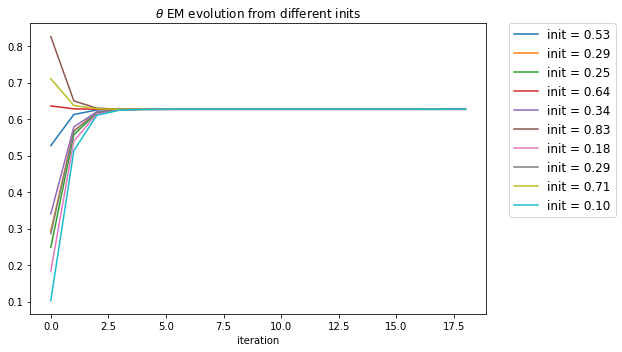

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
final_thetas = []
for theta0, trace in theta_trace_dict.items():
    final_theta = trace[-1]
    final_thetas.append(final_theta)
    ax.plot(trace, label='init = %.2f' % (theta0))
    
ax.set_title(r'$\theta$ EM evolution from different inits')
ax.set_xlabel('iteration')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=12)
plt.tight_layout()

print('mean converged theta = ', np.mean(final_thetas))

<div class="answer-separator">
------------------------
</div>

## Question 2: Predicting the Prior Like a Punch to the Kidneys 

**Some coding required**

In this problem we will work with the US Kidney Cancer Dataset (by county), a dataset of kidney cancer frequencies across the US over 5 years on a per county basis. 

The kidney cancer data can be found [here](./kcancer.csv).

A casual inspection of the data might suggest that we independently model cancer rates for each of the provided counties.  Our experience in past homeworks/labs/lectures (in particular when we delved into the Rat Tumors problem) suggests potential drawbacks of conclusions based on raw cancer rates.  Addressing these drawbacks, let's look use a Bayesian model for our analysis of the data. In particular you will implement an Empircal Bayes model to examine the adjusted cancer rates per county.

Let $N$ be the number of counties; let $y_j$ the number of kidney cancer case for the $j$-th county, $n_j$ the population of the $j$-th county and $\theta_j$ the underlying kidney cancer rate for that county. We can construct a Bayesian model for our data as follows:
\begin{aligned}
y_j &\sim Poisson(5 \cdot n_j \cdot \theta_j), \quad j = 1, \ldots, N\\
\theta_j &\sim Gamma(\alpha, \beta), \quad j = 1, \ldots, N
\end{aligned}
where $\alpha, \beta$ are hyper-parameters of the model.

2.1. Consider the **prior-predictive** distribution (also called the evidence i.e. the denominator normalization in bayes theorem) of the model: $p(y) = \int p(y \vert \theta) p(\theta) d \theta$. Why the prior-predictive? Because technically we "haven't seen" individual county data yet. And, our data are on the scale of $y$, not the rates $\theta$. Write an expression for the negative binomial prior-predictive for this model.

**Note:** Up until now we've had primarily thought about the posterior predictive: $\int p( y \vert \theta) p(\theta \vert D) d\theta$.  The posterior predictive and the prior predictive can be somewhat connected. In conjugate models such as ours, the two distributions have the same form.

2.2. Implement Empirical Bayes via moment matching by matching the mean and the variance (central moments) of the negative binomial you calclated in 2.1 to the sample mean and variance from the data.  Find appropriate expressions/values for $\alpha$ and $\beta$. 

**Hint:** You need to be careful with the $5n_j$ multiplier.

2.3. Use the values of $\alpha$ and $\beta$ you derived in 2.2 to generate 5000 posterior samples for the kidney cancer rates for each county.  Use these samples to generate a posterior mean rate for each county.

2.4. Produce a scatter plot of the raw cancer rates (pct mortality) vs the county population size. Highlight the top 300 raw cancer rates in red. Highlight the bottom 300 raw cancer rates in blue. Finally, on the same plot add a scatter plot visualization of the posterior mean cancer rate estimates (pct mortality) vs the county population size, highlight these in green.

2.5. Using the above scatter plot, explain why using the posterior means from our model to estimate cancer rates is preferable to studying the raw rates themselves.

**Hint:** You might also find it helpful to follow the Rat Tumor example.


**Gratuitous Pop Culture Bayesian Reference**: 

![](https://www.explainxkcd.com/wiki/images/b/bd/modified_bayes_theorem.png)

### Answer 2.1

$$
\begin{align}
p(y) &= \int p(y \vert \theta) p(\theta) d \theta \\ 
&= \int_0^\infty \frac{(5n \theta)^y e^{-(5n \theta)}}{y!} \frac{\beta^\alpha}{\Gamma(\alpha)} \theta^{\alpha - 1} e^{-\beta \theta} d\theta \\
&= \frac{(5n)^y \cdot \beta^\alpha}{y! \cdot \Gamma(\alpha)} \int_0^\infty \theta^{y+\alpha-1} e^{-(5n+\beta) \theta} d\theta \\
&= \frac{(5n)^y \cdot \beta^\alpha \cdot \Gamma(\alpha^\prime)}{y! \cdot {\beta^\prime}^{\alpha^\prime} \cdot \Gamma(\alpha)} \int_0^\infty \frac{{\beta^\prime}^{\alpha^\prime}}{\Gamma(\alpha^\prime)} \theta^{\alpha^\prime - 1} e^{-\beta^\prime \theta} d\theta
&&& \alpha^\prime = y + \alpha \quad \beta^\prime = 5n + \beta \\
&= \frac{(5n)^y \cdot \beta^\alpha \cdot \Gamma(y+\alpha)}{y! \cdot (5n+\beta)^{y+\alpha} \cdot \Gamma(\alpha)} \\
&= \frac{(y+\alpha-1)}{y! \cdot (\alpha-1)!} \Big(\frac{5n}{5n+\beta} \Big)^y \Big(\frac{\beta}{5n+\beta} \Big)^\alpha \\
&= \binom{y + \alpha - 1}{y} \Big(\frac{5n}{5n+\beta} \Big)^y \Big(\frac{\beta}{5n+\beta} \Big)^\alpha \\
&= \text{Negative Binomial} \Big(\alpha, \frac{5n}{5n + \beta} \Big)
\end{align}
$$

Negative Binomial $\Big(\alpha, \frac{5n}{5n + \beta} \Big)$:
- Number of failures: $\alpha$, 
- Number of successes: $y$
- Probability of success: $\frac{5n}{5n + \beta}$

---
### Answer 2.2

Notation: $E_s[\cdot]$, $V_s[\cdot]$ for sample mean and variance; $E[\cdot]$, $V[\cdot]$ for theoretical mean and variance.

$$
\begin{align}
&y_i \sim \text{Negative Binomial} (\alpha, \frac{5n_i}{5n_i + \beta}) \\
E_s[y_j] &\approx E[y_j] = \frac{5 n_j \alpha}{\beta} \\
V_s[y_j] &\approx V[y_j] = \alpha \Big(\frac{5 n_j}{\beta} \Big) \Big(\frac{5 n_j + \beta}{\beta} \Big) = \frac{25 n_j^2 \alpha}{\beta^2} + \frac{5 n_j \alpha}{\beta} \\
E_s[\frac{y_j}{n_j}] &\approx \frac{E_s[y_j]}{n_j} = \frac{5 \alpha}{\beta} \\
V_s[\frac{y_j}{n_j}] &\approx \frac{V_s[y_j]}{n_j^2} = \frac{25 \alpha}{\beta^2} + \frac{5 \alpha}{\beta n_j} \approx \frac{25 \alpha}{\beta^2} + \frac{5 \alpha}{\beta E_s[n_j]} \\
&\Longrightarrow \beta \approx \frac{5}{\frac{V_s[\frac{y_j}{n_j}]}{E_s[\frac{y_i}{n_i}]} - \frac{1}{E_s[n_j]}}, \quad \alpha \approx \frac{\beta E_s[\frac{y_i}{n_i}]}{5}
\end{align}
$$

In [5]:
# 2.2
df_kcancer = pd.read_csv('kcancer.csv')
df_kcancer.head()

,state,fips,county,countyfips,dc,pop,pct_mortality
0,ALABAMA,1,AUTAUGA,1001,1.0,64915.0,0.000015
1,ALABAMA,1,BALDWIN,1003,15.0,195253.0,0.000077
2,ALABAMA,1,BARBOUR,1005,1.0,33987.0,0.000029
3,ALABAMA,1,BIBB,1007,1.0,31175.0,0.000032
4,ALABAMA,1,BLOUNT,1009,5.0,91547.0,0.000055


In [6]:
n = df_kcancer['pop'].astype(int)
y = df_kcancer['dc'].astype(int)
p = df_kcancer['pct_mortality']

In [7]:
# beta_est = 5*n.mean() / (y.var()/y.mean()-1)
# alpha_est = beta_est*y.mean() / (5*n.mean())
# beta_est, alpha_est

In [8]:
beta_est = 5 / (p.var()/p.mean() - 1/n.mean())
alpha_est = beta_est * p.mean() / 5
print('estimated beta = {}, alpha = {}'.format(beta_est, alpha_est))

estimated beta = 133464.15033286557, alpha = 1.54459458659545


### Answer 2.3

Posterior on $\theta$:

$$
\begin{align}
p(\theta \vert y) &\propto p(y \vert \theta) p(\theta) \\
&= \frac{(5n \theta)^y}{y!} \frac{\beta^\alpha}{\Gamma(\alpha)} \theta^{\alpha - 1} e^{-\beta \theta} \\
&= \frac{(5n)^y \cdot \beta^\alpha}{y! \cdot \Gamma(\alpha)} \theta^{y+\alpha-1} e^{-(5n+\beta) \theta} \\ \\
&\propto \text{Gamma}(y + \alpha, 5n + \beta)
\end{align}
$$

$\Longrightarrow$ Posterior on $\theta$ is still a $\text{Gamma}(\alpha^\prime = y + \alpha, \beta^\prime = 5n + \beta)$

In [9]:
# 2.3
repeat = 5000
alpha_p = alpha_est + y
beta_p = beta_est + 5 * n
posterior = np.zeros([repeat, len(df_kcancer)])

for i in range(repeat):
    posterior[i,:] = np.random.gamma(alpha_p, 1./beta_p)

# posterior mean mortality rate = 5 * mean(theta_posterior)
df_kcancer['post_mean_rate'] = 5 * posterior.mean(axis=0)
df_kcancer.head()

,state,fips,county,countyfips,dc,pop,pct_mortality,post_mean_rate
0,ALABAMA,1,AUTAUGA,1001,1.0,64915.0,0.000015,0.000028
1,ALABAMA,1,BALDWIN,1003,15.0,195253.0,0.000077,0.000074
2,ALABAMA,1,BARBOUR,1005,1.0,33987.0,0.000029,0.000043
3,ALABAMA,1,BIBB,1007,1.0,31175.0,0.000032,0.000043
4,ALABAMA,1,BLOUNT,1009,5.0,91547.0,0.000055,0.000055


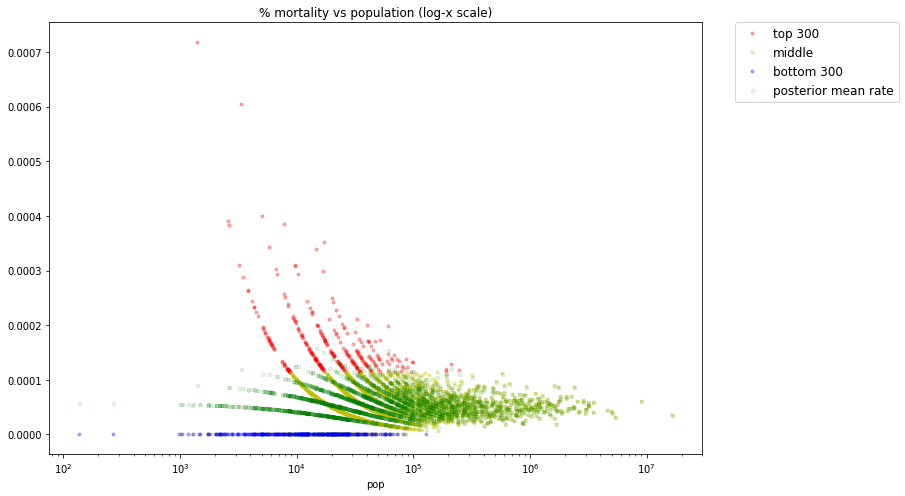

In [10]:
# 2.4
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
df_kcancer_sorted = df_kcancer.sort_values(['pct_mortality'], ascending=False)
df_kcancer_sorted.iloc[:300].plot(x='pop', y='pct_mortality', style='o', c='r', ms=3, alpha=0.3, ax=ax, 
                                  label='top 300')
df_kcancer_sorted.iloc[300:-300].plot(x='pop', y='pct_mortality', style='o', c='y', ms=3, alpha=0.3, ax=ax, 
                                  label='middle')
df_kcancer_sorted.iloc[-300:].plot(x='pop', y='pct_mortality', style='o', c='b', ms=3, alpha=0.3, ax=ax, 
                                  label='bottom 300')
df_kcancer_sorted.plot(x='pop', y='post_mean_rate', style='s', c='g', ms=3, alpha=0.1, ax=ax, 
                                  label='posterior mean rate')
ax.set_xscale('log')
# ax.set_ylim(-0.0002, 0.0005)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=12)
ax.set_title('% mortality vs population (log-x scale)')
plt.tight_layout()

### Answer 2.5
**Using the above scatter plot, explain why using the posterior means from our model to estimate cancer rates is preferable to studying the raw rates themselves.**

Using the posterior means from our model to estimate cancer rates is preferable to studying the raw rates because of the idea of sharing statistical strength. In this problem, different units (i.e. counties) have different statistical robustness based on their varying sizes of population. From the plot above, we observe that counties with a population of less than $10^5$ have a higher tendency to exhibit outlier like behaviors, either extremely high or essentially 0 % mortality (raw cancer rates). Using the posterior means, these outlier behaviors are significant reduced, and thus the model is more robust. 

<div class="answer-separator">
------------------------
</div>

## Question 3: Martin Garrix, Tiesto, Marshmello on the 1s and 2s.  Is that a Mixture of Experts?

**Some coding required**

What if you had to predict a one-to-many function? The data provided below comes from a dataset generated by Chris Bishop (yes that Bishop) to explain the models mentioned in the title above. We have included a pdf from his book which describe these models in some detail. This problem will continure in future homework where we shall learn to sample from this model and also how to solve it using mixture density networks.

We read this data in...

In [11]:
df = pd.read_csv('onetomany.csv')
df.head()

,target,x
0,0.000000,0.018727
1,0.001001,0.050424
2,0.002002,0.042375
3,0.003003,0.038596
4,0.004004,0.019352


...and then plot it. Notice both the uneven sampling (more towards the center), and the "more than one y" for a given x.

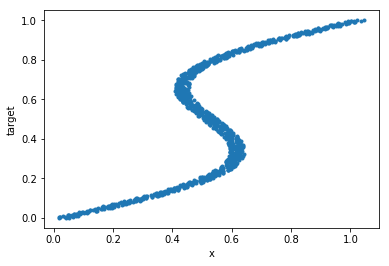

In [12]:
plt.plot(df.x, df.target, '.')
plt.xlabel('x')
plt.ylabel('target')
plt.show()

Normal regression approaches to modeling such a function wont work, as they expect the function to be a proper mathematical function, that is, single valued.

These kind of problems are called **inverse problems**, where more than one input state leads to an output state, and we have to try and model these multiple input states.

A mixture of gaussians (or other distributions) might is a sensible way to do this.

You choose one of the gaussians with some probability. The mean of the gaussian is then given by some regression function, say for example a straight line. We could additionally fix the standard deviation or model it as well. 

Thus, for each component Gaussian, we choose a functional form for the mean and standard deviation. So our model looks something like this:

$$f(x)  = \sum_i \lambda_i g_i (x) $$

Say we fit a model with 3 gaussians to this data. Such a model cannot fit the function above. Notice for example that at $x=0.2$ only one of the gaussians will dominate, different from the situation at $x=0.5$. This means that the probabilities of "belonging" to one or the other gaussians is also changing with $x$.

If we allow the mixing probabilities to depend on $x$, we can model this situation.

$$f(x)  = \sum_i \lambda_i (x) g_i (x) $$

Such a model is called a "mixture of experts" model. The idea is that one "expert" gaussian is responsible in one sector of the feature space, while another expert is responsible in another sector.

You can think of this model as implementing a "standard" gaussian mixture at each "point" x, with the added complexity that all of the means, standard deviations, and mixture probabilities change from one x to another.

See https://www.cs.toronto.edu/~hinton/absps/hme.pdf and http://www.ee.hacettepe.edu.tr/~eyuksel/Publications/2012_TwentyYearsofMixtureofExperts.pdf for more details. I found the latter clearer and easier to understand.

For this entire question you might find diagram code from [here](https://github.com/hardmaru/pytorch_notebooks/blob/master/mixture_density_networks.ipynb) useful. Take with attribution.

We will assume we have **3 gaussians**.

### Iterative Linear Regression Mixture of Experts Model

The basic idea, illustrated below, is to fit piecewise linear regressions iteratively in a EM style algorithm.

![](./mixreg0.png)

The algorithm looks like this: 

- Initialize the 1000 points in this dataset as randomly belonging to one of 3 "classes" or "clusters" or "experts". This takes a x-data problem and augments it with a fake z data point that tells us whether the point belongs in cluster 0, 1, or 2. (It helps convergence to say that points in the leftmost 0.2 belong to cluster 0 and righmost 0.2 to cluster 2).

- With the fake z's in hand the 1000 points can be separated (based on cluster assignment) into 3 sets of points and used to fit 3 linear regression models. 

- Predictions can be made for all 1000 points on the data for each of the 3 regression lines. Reassign each data point to a cluster by choosing the cluster that minimizes the prediction error based on the squared distances between its actual y value and the 3 cluster predictions.

- Rinse and repeat.

3.1. We stated that "*It helps convergence to say that points in the leftmost 0.2 belong to cluster 0 and righmost 0.2 to cluster 2*".  Why might it help convergence to define an initial cluster assignment as opposed to random assignment?

3.2. Specify a potential convergence criterion to use.  Why might you choose it?

3.3. Implement the algorithm we described along with the convergence criterion you chose in 3.2.  You can use a linear regression fitter of your choice (statsmodels, sklearn, your own...).

3.4. Apply your algorithm in the data in the `df` dataframe to produce a diagram like the one above which illustrates the straight line fits as well as the cluster belonging. 


**Note for those who want to read more** The mixture of experts can be implemented using Expectation Maximization using iteratively-reweighted least squares. Our method in A was merely an approximation to this process. You can find update equations [here](https://people.eecs.berkeley.edu/~jordan/papers/jordan-xu.ps)

**Gratuitous Titular Reference**:  [DJs](https://martingarrix.com/), [DJs](https://www.tiesto.com/), [DJs](https://marshmellomusic.com/).

### Answer 3.1
The iterations are not stochastic and therefore the algorithm works better with more likely initializations to avoid being stuck in a local minimal. Also notice that fitting on leftmost 0.2 and righmost 0.2 will give us linear regression lines with different coefficients. This initialization could help seperate three regression models in the following iterations. 

---
### Answer 3.2
Convergence criterion: when the linear regression loss (least square error) ,or equivalently, difference between the updated z's and their old values is small enough. 

$$||z_{\text{new}} - z||_2^2 < \text{crit}$$

---
### Answer 3.3

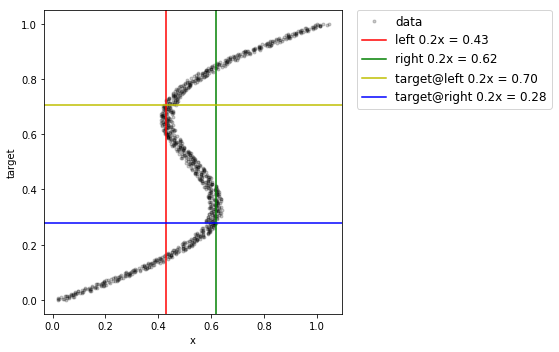

In [13]:
left = np.percentile(df['x'].values, 20)
right = np.percentile(df['x'].values, 80)
target_left = df[df['x']<left]['target'].max()
target_right = df[df['x']>right]['target'].min()

fig, ax = plt.subplots(1,1, figsize=(5, 5))
ax.plot(df.x, df.target, 'k.', alpha=0.2, label='data')
ax.axvline(left, c='r', label='left 0.2x = %.2f' % (left))
ax.axvline(right, c='g', label='right 0.2x = %.2f' % (right))
ax.axhline(target_left, c='y', label='target@left 0.2x = %.2f' % (target_left))
ax.axhline(target_right, c='b', label='target@right 0.2x = %.2f' % (target_right))
ax.set_xlabel('x')
ax.set_ylabel('target')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=12)
plt.tight_layout()

In [14]:
if 'z_true' in df.columns:
    df.drop(['z_true'], axis=1, inplace=True)
if 'z' in df.columns:
    df.drop(['z'], axis=1, inplace=True)

# label z_true
df['z_true'] = np.zeros((len(df),)).astype(int)
df.loc[df['target']>=target_left, ['z_true']] = 2
df.loc[(df['target']>target_right) & (df['target']<target_left), ['z_true']] = 1
df.loc[df['target']<=target_right, ['z_true']] = 0

# initialize z
df['z'] = np.zeros((len(df),)).astype(int)
df.loc[df['x']>=right, ['z']] = 2
df.loc[(df['x']>left) & (df['x']<right), ['z']] = np.random.choice([0,1,2], 
                                                                   size=len(df[(df['x']>left) & (df['x']<right)]))
df.head()

,target,x,z_true,z
0,0.000000,0.018727,0,0
1,0.001001,0.050424,0,0
2,0.002002,0.042375,0,0
3,0.003003,0.038596,0,0
4,0.004004,0.019352,0,0


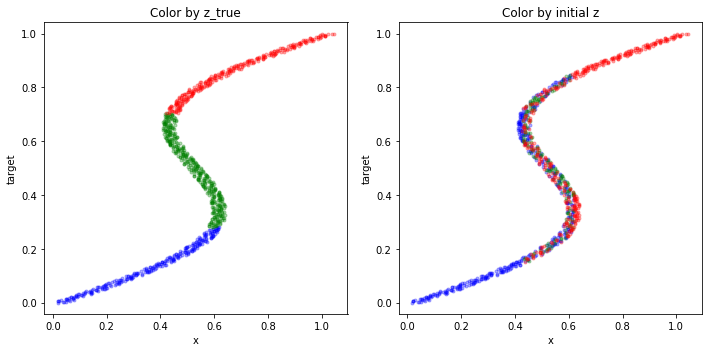

In [15]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
ax[0].plot(df[df['z_true']==0]['x'], df[df['z_true']==0]['target'], 'b.', alpha=0.3)
ax[0].plot(df[df['z_true']==1]['x'], df[df['z_true']==1]['target'], 'g.', alpha=0.3)
ax[0].plot(df[df['z_true']==2]['x'], df[df['z_true']==2]['target'], 'r.', alpha=0.3)
ax[0].set_xlabel('x')
ax[0].set_ylabel('target')
ax[0].set_title('Color by z_true')

ax[1].plot(df[df['z']==0]['x'], df[df['z']==0]['target'], 'b.', alpha=0.3)
ax[1].plot(df[df['z']==1]['x'], df[df['z']==1]['target'], 'g.', alpha=0.3)
ax[1].plot(df[df['z']==2]['x'], df[df['z']==2]['target'], 'r.', alpha=0.3)
ax[1].set_xlabel('x')
ax[1].set_ylabel('target')
ax[1].set_title('Color by initial z')

ax[0].axis('equal')
ax[1].axis('equal')
plt.tight_layout()

In [16]:
# Stopping criterion
iterations = 0
n_err = (df['z'] != df['z_true']).sum()
convergence = False
crit = 1e-15

while not convergence:
    iterations += 1 
    
    # fit 3 linear regressions
    df_a = df[df['z'] == 0]
    df_b = df[df['z'] == 1]
    df_c = df[df['z'] == 2]
    
    lr_a = LinearRegression().fit(df_a[['x']], df_a['target'])
    lr_b = LinearRegression().fit(df_b[['x']], df_b['target'])
    lr_c = LinearRegression().fit(df_c[['x']], df_c['target'])
    
    # re-assign z's
    preds_err = np.zeros((len(df), 3))
    preds_err[:, 0] = np.square(lr_a.predict(df[['x']]) - df['target'])
    preds_err[:, 1] = np.square(lr_b.predict(df[['x']]) - df['target'])
    preds_err[:, 2] = np.square(lr_c.predict(df[['x']]) - df['target'])
    z_new = np.argmin(preds_err, axis=1)
    
    # test convergence
    convergence = (np.linalg.norm((z_new - df['z'])) < crit)
    n_err = (df['z'] != df['z_true']).sum()
    
    # update z's
    df['z'] = z_new

print('Iterations = {}'.format(iterations))


Iterations = 7


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


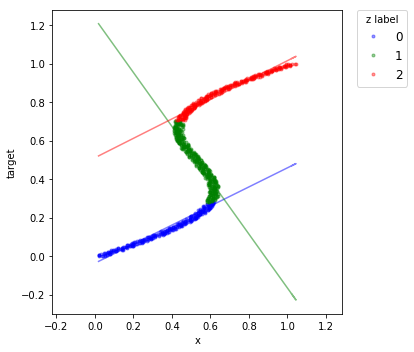

In [17]:
# after convergence, refit 3 linear regression, and make predictions
df_a = df[df['z'] == 0]
df_b = df[df['z'] == 1]
df_c = df[df['z'] == 2]

pred_a = LinearRegression().fit(df_a[['x']], df_a['target']).predict(df[['x']])
pred_b = LinearRegression().fit(df_b[['x']], df_b['target']).predict(df[['x']])
pred_c = LinearRegression().fit(df_c[['x']], df_c['target']).predict(df[['x']])

fig, ax = plt.subplots(1,1, figsize=(5, 5))
ax.plot(df[df['z_true']==0]['x'], df[df['z_true']==0]['target'], 'b.', alpha=0.4, label='0')
ax.plot(df[df['z_true']==1]['x'], df[df['z_true']==1]['target'], 'g.', alpha=0.4, label='1')
ax.plot(df[df['z_true']==2]['x'], df[df['z_true']==2]['target'], 'r.', alpha=0.4, label='2')

ax.plot(df['x'], pred_a, 'b-', alpha=0.5)
ax.plot(df['x'], pred_b, 'g-', alpha=0.5)
ax.plot(df['x'], pred_c, 'r-', alpha=0.5)

ax.set_xlabel('x')
ax.set_ylabel('target')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=12, title='z label')
plt.axis('equal')
plt.tight_layout()

<div class="answer-separator">
------------------------
</div>